# MILP

In this notebook we will cover MILP models.

In [1]:
import numpy as np

from bnbprob.milpy import MILP
from bnbpy import (
    BranchAndBound,
    BreadthFirstBnB,
    configure_logfile,
    plot_tree,
)

In [2]:
configure_logfile("milp.log", mode="w")

## Simple model

The simple model has the form.

$$
 \begin{align}
     \text{maximize}~ \;\; & 5 x_{1} + 4 x_{2} \\
     \text{subject to}~ \;\; & 2 x_{1} + 3 x_{2} \leq 12 \\
     & 2 x_{1} + x_{2} \leq 6 \\
     & x_{i} \geq 0 & \forall \; i \in \{  1, 2 \} \\
     & x_{i} \in \mathbb{Z} & \forall \; i \in \{  1, 2 \}
 \end{align}
$$

In [3]:
# Simple problem
c = np.array([-5.0, -4.0])

A_ub = np.array(
    [[2.0, 3.0],
     [2.0, 1.0]]
)
b_ub = np.array([12.0, 6.0])

milp = MILP(c, A_ub=A_ub, b_ub=b_ub)
bfs = BreadthFirstBnB()
sol = bfs.solve(milp)
print(f"Sol: {sol} | x: {sol.x}")

Sol: Status: OPTIMAL | Cost: -18.0 | LB: -18.333333333333336 | x: [2. 2.]


In [4]:
dfs = BranchAndBound()
sol = dfs.solve(milp)
print(f"Sol: {sol} | x: {sol.x}")

Sol: Status: OPTIMAL | Cost: -18.0 | LB: -18.0 | x: [2. 2.]


## Multi-dimensional knapsack

In [7]:
# Two-dimensional knapsack
np.random.seed(42)

N = 10  # Number of items

# Weight associated with each item
w = np.random.normal(loc=5.0, scale=1.0, size=N).clip(0.5, 10.0)
v = np.random.normal(loc=6.0, scale=2.0, size=N).clip(0.5, 10.0)

# Price associated with each item
c = -np.random.normal(loc=10.0, scale=1.0, size=N).clip(0.5, 20.0)

# knapsack capacity
kw = 21.0
kv = 22.0

A_ub = np.atleast_2d([w, v])
b_ub = np.array([kw, kv])

milp = MILP(c, A_ub=A_ub, b_ub=b_ub, bounds=(0, 1))
bnb = BranchAndBound(save_tree=True)
sol = bnb.solve(milp, maxiter=250)
print(f"Nodes explored: {bnb.explored}")
print(f"Sol: {sol} | {bnb.explored} iterations")

Nodes explored: 71
Sol: Status: OPTIMAL | Cost: -41.726493076490556 | LB: -41.726493076490556 | 71 iterations


And we can plot the search tree.

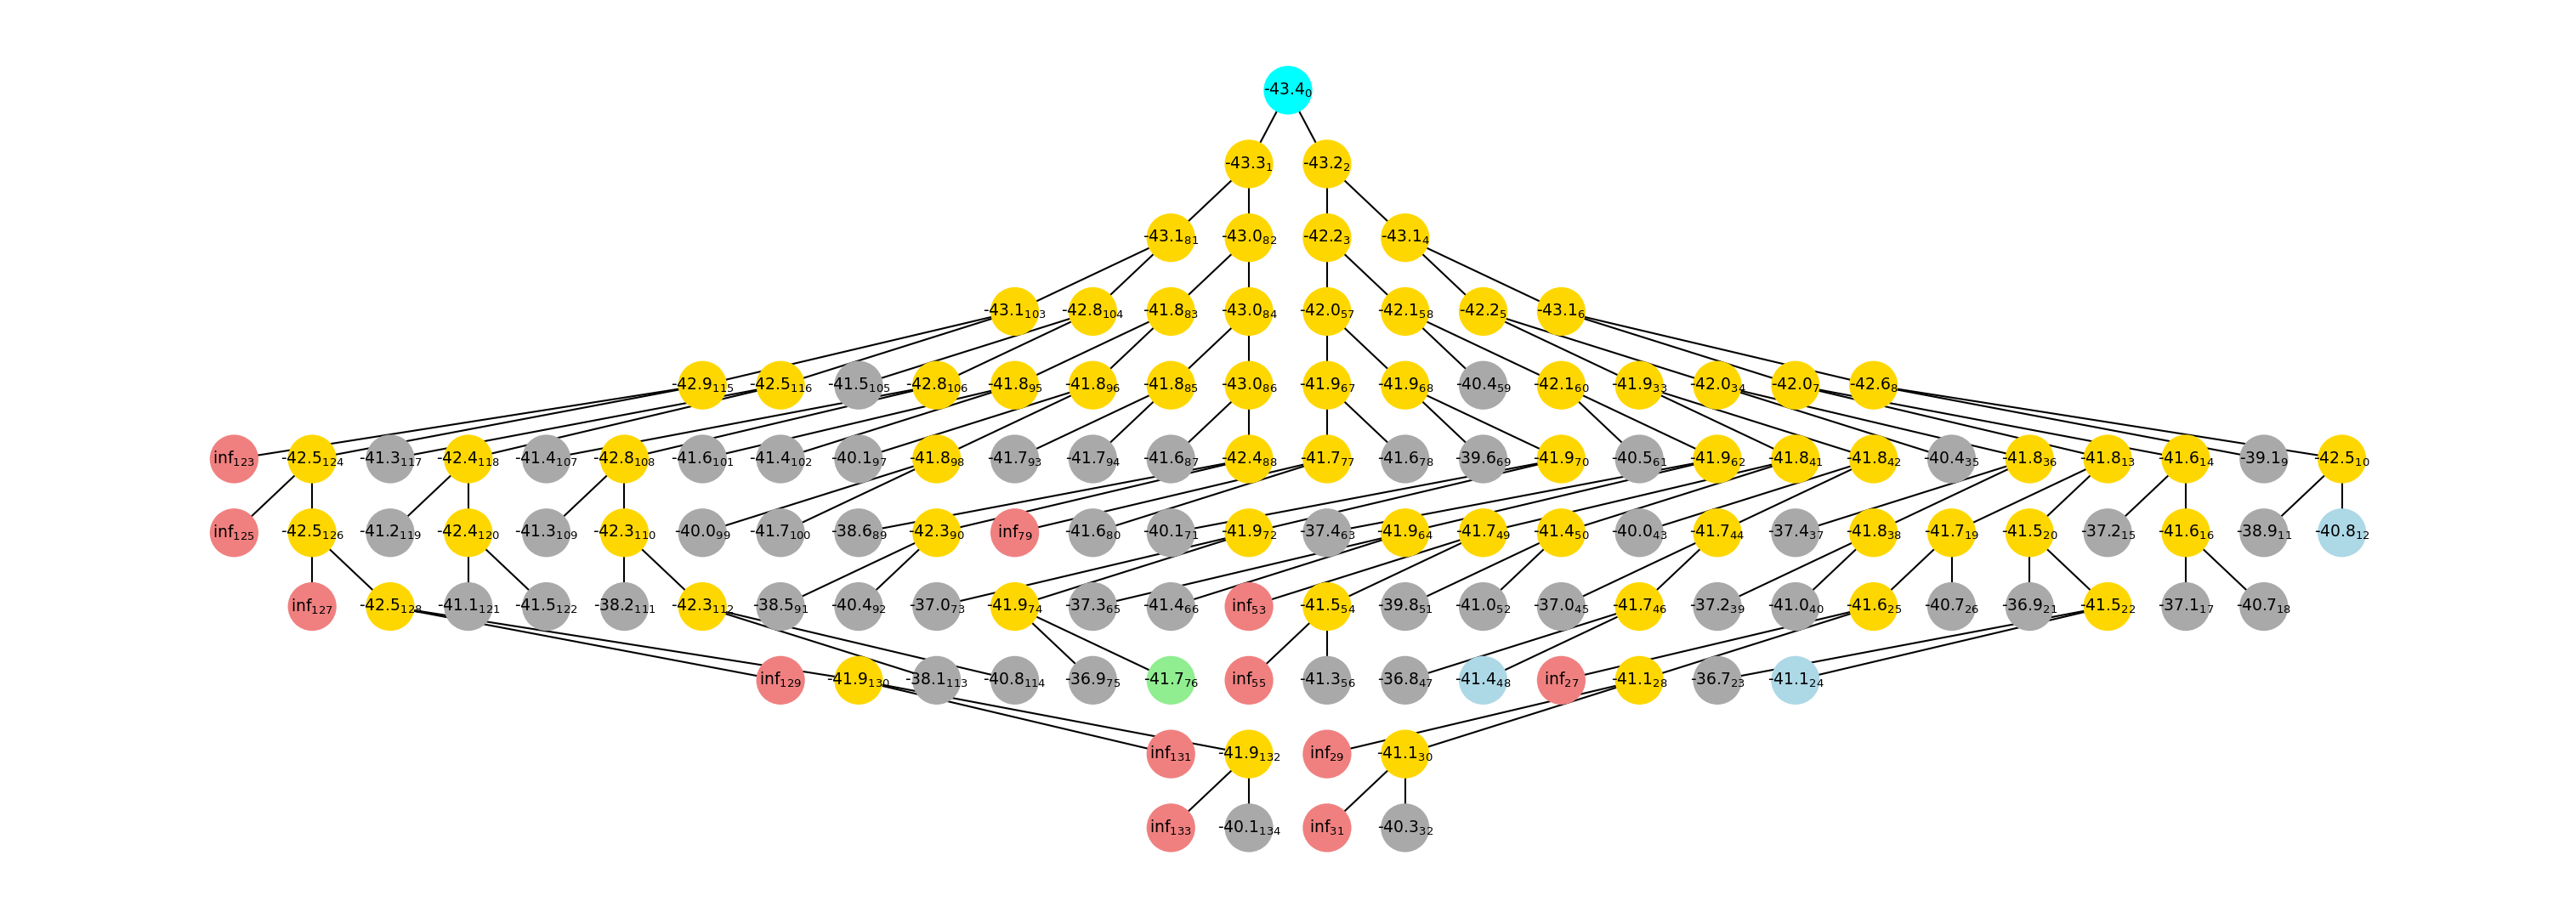

In [8]:
plot_tree(bnb.root, font_size=9, figsize=[20, 7], dpi=150)